# Distributions and Generating Random Numbers

To begin with, this is the code at the end of the randomness notebook, where we first saw the 'shape' or distribution of the results of a given number of coin flips, but modified to only perform a single flip per sequence, instead of ten.

### Random Distributions

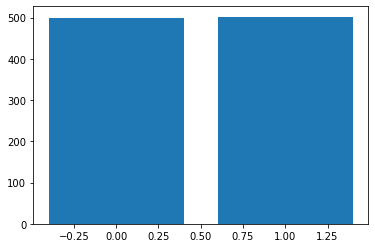

In [7]:
import matplotlib.pyplot as plt
import numpy as np

coins = 1
trials = 1000
# run a the defined number of trials
heads = np.random.binomial(coins, 0.5, trials)
# count the unique values in the returned list
vals, counts = np.unique(heads, return_counts=True)
plt.bar(vals, counts)
plt.show()

This is generally known as a discrete uniform binomial distribution, because we expect the two (hence binomial) outcomes to have the same or similar (hence uniform) chance of occurring, in practice the results will usually be close to this but not perfect.

In [8]:
# The number of possible outcomes
n = 11

# What is the next biggest power of 2 after 11? It is 16.
b = 4

flips = np.random.binomial(1,0.5,b)

# convert it to binary
number = 0
for i in range(len(flips)):
    number = number + flips[i] * 2**i

# the array below will replicate the order of a binary number, reversed, i.e. 0001 would be 8, which is 1000 in binary
flips, number

(array([0, 1, 0, 0]), 2)

In [9]:
# Make a function to convert four coin flips to an integer (16 equally possible outcomes).
def gen_number(b=4):
    # flip b coins, in this case four flips, so any binary digit up to fifteen as
    # this is the last binary number with four digits (1000). Changing b to 5
    # would return base-10 numbers up to 31 (or 11111 in binary). Remember that in
    # creating the list, the numbers are added in reverse, so it 1000 actually
    # converts to 1 instead of 8, and 0011 is 12 instead of 3.
    flips = np.random.binomial(1,0.5,b)

    # convert it from binary to a base-10 number
    number = 0
    for i in range(len(flips)):
        number = number + flips[i] * 2**i
    return number

In [10]:
gen_number()

5

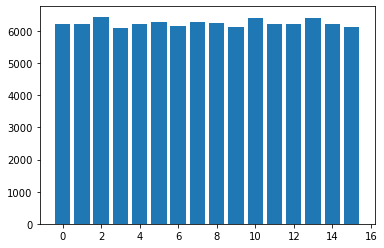

In [11]:
# Generate a list of outcomes of these flip sequences, so flip four coins 100,000 times
no_outcomes = 100000
# being wrapped in square brackets puts the results of each instance of the loop into a list
outcomes = [gen_number() for i in range(no_outcomes)]

# Count the unique values in the returned list, and plot them
vals, counts = np.unique(outcomes, return_counts=True)
plt.bar(vals, counts)
plt.show()

As you increase the number assigned to no_outcomes from 100, to 1000, to 100000, you can see that the distribution gradually becomes more uniform.

The point of learning this is that in the numPy [documentation](https://numpy.org/doc/stable/reference/random/index.html), the method of generating random numbers is assigned to a tool called BitGenerator, which are:

    Objects that generate random numbers. These are typically unsigned integer world filled with sequences of either 32 or 64 random bits.
    
The key is in the last part and the word bits, these sequences are generated entirely using binary numbers, so essentially the same as the 1 or 0 we are creating with each coin flip.

### Random Distributions in numPy

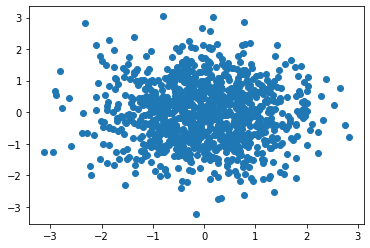

In [33]:
# https://www.numpy.org/doc/stable/reference/random/index.html
import numpy as np
import matplotlib.pyplot as plt

# this is a new instance of a random number generator
rng = np.random.default_rng()
vals = rng.standard_normal(1000)
more_vals = rng.standard_normal(1000)

plt.scatter(vals, more_vals)
plt.show()

One crucial distinction to make here is the concept of seeding. Note that in the below, a parameter is passed to the `default_rng` function. When the code is re-run, the distribution never changes, as apposed to above when the datasets change each time. Without the seed being specified by the user, it is specified by the referring to the milliseconds on the computer clock at runtime, which is obviously very difficult to replicate. Being able to set this seed is extremely helpful for debugging or generating a particular distribution but with data that will not change.

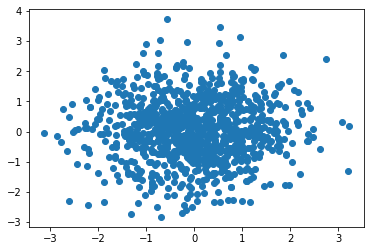

In [32]:
rng = np.random.default_rng(seed=12345)
vals = rng.standard_normal(1000)
more_vals = rng.standard_normal(1000)

plt.scatter(vals, more_vals)
plt.show()

### Standard Normal distribution

Of course, with random data or not, there are many different types of distributions, and has hinted by the function name, the data above is an example of the Standard Normal distribution, popularly known as the bell curve.

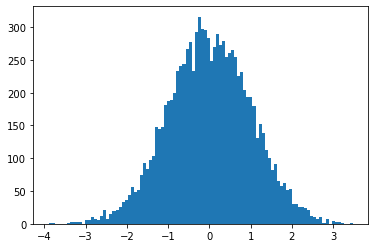

In [47]:
rng = np.random.default_rng(0)
samples = rng.standard_normal(10000)
# the numbers generated will be written using exponential notation, which means that if the last digit is a -01
# then you move the decimal place 1 digit to the left, and if it's +00 then it stays where it is.
# i.e 9.9900969e-01 becomes 0.9900969.

fig, ax = plt.subplots()
# you can use the bins parameter to further segment the number of bars that are displayed
ax.hist(samples, bins=100)
plt.show()